In [67]:
import joblib
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from IPython.core.interactiveshell import InteractiveShell

warnings.filterwarnings("ignore")

In [43]:
plt.rc('font', family='GULIM')
warnings.filterwarnings(action='ignore')
InteractiveShell.ast_node_interactivity = "all"

In [3]:
test_in = pd.read_csv('Database/test_pre_input.csv', index_col=0)
test_out = pd.read_csv('Database/test_pre_output.csv', index_col=0)

In [99]:
i = 5
name_list = ['None', 'SMOTE', 'ADASYN', 'KMeanSMOTE', 'SMOTE_all', 'KMeanSMOTE_all']
best_dt = joblib.load(f'Files/dt_{name_list[i]}_model.pkl')
best_lgb = joblib.load(f'Files/lgb_{name_list[i]}_model.pkl')
best_xgb = joblib.load(f'Files/xgb_{name_list[i]}_model.pkl')
best_cat = joblib.load(f'Files/cat_{name_list[i]}_model.pkl')

In [100]:
proba1 = best_dt.predict_proba(test_in)
proba2 = best_lgb.predict_proba(test_in)
proba3 = best_xgb.predict_proba(test_in)
proba4 = best_cat.predict_proba(test_in)
average_proba = (proba1 + proba2 + proba3 + proba4) / 4

dt_result = np.argmax(proba1, axis=1)
lgb_result = np.argmax(proba2, axis=1)
xgb_result = np.argmax(proba3, axis=1)
cat_result = np.argmax(proba4, axis=1)
soft_voting_result = np.argmax(average_proba, axis=1)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [101]:
metric_df = pd.DataFrame(columns=['DT', 'LGBM', 'XGB', 'CAT', 'Soft Voting'],
                         index=['Accuracy', 'Recall', 'Precision', 'F1-Score', 'AUC'])

In [102]:
metric_df.loc['Accuracy', 'DT'] = f"{accuracy_score(test_out, dt_result):.5f}"
metric_df.loc['Recall', 'DT'] = f"{recall_score(test_out, dt_result, average='weighted'):.5f}"
metric_df.loc['Precision', 'DT'] = f"{precision_score(test_out, dt_result, average='weighted'):.5f}"
metric_df.loc['F1-Score', 'DT'] = f"{f1_score(test_out, dt_result, average='weighted'):.5f}"
metric_df.loc['AUC', 'DT'] = f"{roc_auc_score(test_out, proba1, multi_class='ovr', average='weighted'):.5f}"

metric_df.loc['Accuracy', 'LGBM'] = f"{accuracy_score(test_out, lgb_result):.5f}"
metric_df.loc['Recall', 'LGBM'] = f"{recall_score(test_out, lgb_result, average='weighted'):.5f}"
metric_df.loc['Precision', 'LGBM'] = f"{precision_score(test_out, lgb_result, average='weighted'):.5f}"
metric_df.loc['F1-Score', 'LGBM'] = f"{f1_score(test_out, lgb_result, average='weighted'):.5f}"
metric_df.loc['AUC', 'LGBM'] = f"{roc_auc_score(test_out, proba2, multi_class='ovr', average='weighted'):.5f}"

metric_df.loc['Accuracy', 'XGB'] = f"{accuracy_score(test_out, xgb_result):.5f}"
metric_df.loc['Recall', 'XGB'] = f"{recall_score(test_out, xgb_result, average='weighted'):.5f}"
metric_df.loc['Precision', 'XGB'] = f"{precision_score(test_out, xgb_result, average='weighted'):.5f}"
metric_df.loc['F1-Score', 'XGB'] = f"{f1_score(test_out, xgb_result, average='weighted'):.5f}"
metric_df.loc['AUC', 'XGB'] = f"{roc_auc_score(test_out, proba3, multi_class='ovr', average='weighted'):.5f}"

metric_df.loc['Accuracy', 'CAT'] = f"{accuracy_score(test_out, cat_result):.5f}"
metric_df.loc['Recall', 'CAT'] = f"{recall_score(test_out, cat_result, average='weighted'):.5f}"
metric_df.loc['Precision', 'CAT'] = f"{precision_score(test_out, cat_result, average='weighted'):.5f}"
metric_df.loc['F1-Score', 'CAT'] = f"{f1_score(test_out, cat_result, average='weighted'):.5f}"
metric_df.loc['AUC', 'CAT'] = f"{roc_auc_score(test_out, proba4, multi_class='ovr', average='weighted'):.5f}"

metric_df.loc['Accuracy', 'Soft Voting'] = f"{accuracy_score(test_out, soft_voting_result):.5f}"
metric_df.loc['Recall', 'Soft Voting'] = f"{recall_score(test_out, soft_voting_result, average='weighted'):.5f}"
metric_df.loc['Precision', 'Soft Voting'] = f"{precision_score(test_out, soft_voting_result, average='weighted'):.5f}"
metric_df.loc['F1-Score', 'Soft Voting'] = f"{f1_score(test_out, soft_voting_result, average='weighted'):.5f}"
metric_df.loc[
    'AUC', 'Soft Voting'] = f"{roc_auc_score(test_out, average_proba, multi_class='ovr', average='weighted'):.5f}"

In [103]:
metric_df.to_csv(f'Files/metric_{name_list[i]}.csv')

<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='Importance', ylabel='Feature'>

Text(0.5, 1.0, 'Feature Importance Comparison')

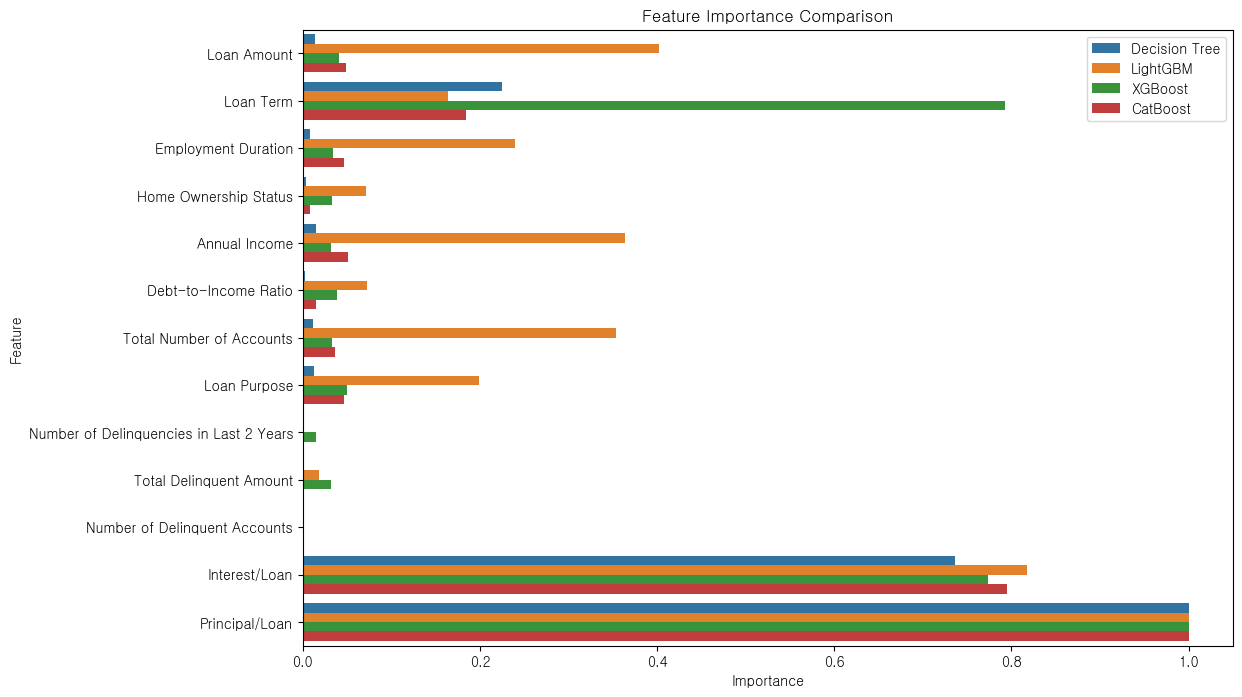

In [76]:
# 특성 중요도 추출
dt_importances = best_dt.feature_importances_
lgb_importances = best_lgb.feature_importances_
xgb_importances = best_xgb.feature_importances_
cat_importances = best_cat.get_feature_importance()

# 특성 중요도를 데이터프레임으로 정리
features = test_in.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Decision Tree': dt_importances,
    'LightGBM': lgb_importances,
    'XGBoost': xgb_importances,
    'CatBoost': cat_importances
})

model_list = ['Decision Tree', 'LightGBM', 'XGBoost', 'CatBoost']

scaler = MinMaxScaler()
importnce_values = scaler.fit_transform(importance_df[model_list].values)

scaled_importance_df = pd.DataFrame(data=importnce_values, columns=model_list)
scaled_importance_df = pd.concat([importance_df['Feature'], scaled_importance_df], axis=1)
column_mapping = {
    '대출기간': 'Loan Term',
    '주택소유상태': 'Home Ownership Status',
    '대출목적': 'Loan Purpose',
    '최근_2년간_연체_횟수': 'Number of Delinquencies in Last 2 Years',
    '연체계좌수': 'Number of Delinquent Accounts',
    '총연체금액': 'Total Delinquent Amount',
    '부채_대비_소득_비율': 'Debt-to-Income Ratio',
    '대출금액': 'Loan Amount',
    '연간소득': 'Annual Income',
    '총계좌수': 'Total Number of Accounts',
    '근로기간': 'Employment Duration',
    '이자/대출': 'Interest/Loan',
    '원금/대출': 'Principal/Loan'
}

scaled_importance_df['Feature'] = scaled_importance_df['Feature'].map(column_mapping)

scaled_importance_df = scaled_importance_df.melt(id_vars=['Feature'], var_name='Model',
                                                 value_name='Importance')

# 시각화
plt.figure(figsize=(12, 8))
sns.barplot(data=scaled_importance_df, x='Importance', y='Feature', hue='Model')
plt.title('Feature Importance Comparison')
plt.legend(loc='upper right')
plt.show()